## <h1><center>Course: Introduction to Machine Learning</center></h1>
## <h1><center>Assigment 4</center></h1>
### <h1><center>Important NOTE: In order to get full credit, for every question, you need to provide the details of your work on how to get to a solution or the end of a proof.</center></h1>
#### <h1><center>Instructor: Tan Bui-Thanh</center></h1>
#### <h1><center>TA: Cole Nockolds</center></h1>
##### <h1><center>Due day: 11:59 pm, 29 October, Friday </center></h1>
#### <h1><center>All submission MUST be in pdf format, except codes. All code outputs should be reported in pdf format.</center></h1>

$\newcommand{\LRp}[1]{\left( #1 \right)}$ 
$\newcommand{\LRs}[1]{\left[ #1 \right]}$ 
$\newcommand{\bs}[1]{\boldsymbol{#1}}$ 
$\newcommand{\x}{\boldsymbol{x}}$ 
$\newcommand{\y}{\boldsymbol{x}}$ 


## **Question 1** (30 points) Probalistic linear regression
Recall: The multivariate Gaussian distribution has the form $\mathcal{N}(\boldsymbol{\mu}, \Sigma)$, $\boldsymbol{\mu} \in \mathbb{R}^n, \Sigma \in \mathbb{R}^{n \times n}$ 

$$\mathcal{N}(\bs{\mu}, \Sigma) = (2 \pi)^{\frac{-n}{2}} \det (\Sigma)^{\frac{-1}{2}} \exp \LRp{-\frac{1}{2} \LRp{\x - \bs{\mu}}^T \Sigma^{-1} \LRp{\x - \bs{\mu}}  } \propto \underbrace{\exp \LRp{-\frac{1}{2} \LRp{\x - \bs{\mu}}^T \Sigma^{-1} \LRp{\x - \bs{\mu}}  }}_{F} $$ 

($\propto$ is to ignore the normalization constant). 

To find the mean $\boldsymbol{\mu}$, we take first derivative of $-\log (F)$ and solve for $\boldsymbol{x}$, i.e.,
$$ \frac{d}{d\x} \LRs{-\log \LRp{F}} = \boldsymbol{0} \implies \x = \bs{\mu}$$

To find the covariance matrix, $\Sigma$, we take the second derivative of $-\log (F)$, which returns $\Sigma^{-1}$, then invert the matrix to obtain $\Sigma$.
$$\Sigma = \LRs{\frac{d^2}{d\x^2} \LRs{-\log \LRp{F}}}^{-1}$$

By these procedures, we can find the mean $\boldsymbol{\mu}$ and the covariance matrix $\Sigma$ of original multivariate Gaussian distribution. In the case that the distribution is not directly the form of Gaussian distribution, for example,
$$F = \exp \LRp{-\frac{1}{2} \LRp{\x^T (A^T A) \x + \x^T \x}}$$

following the same procedure, you would find the mean is $\boldsymbol{0}$, and the covariance matrix is $(A^TA + I)^{-1}$.

---

Now, generate 6 data samples for the problem using the polynomial function (use the below given code for create $x^{(i)}$)
$$ f(x) = .5 - {x} - .5 {x}^2 - 2 {x}^3 + 5 {x}^4.$$
Then add noise:
$y^{(i)} = f(x^{(i)}) + \epsilon$, where $\epsilon \sim \mathcal{N}(0, \delta^2)$, and noise level $\delta = 0.2$. In this problem, we assume that the model is 2nd order, i.e., PolynomialFeatures(degree=2) in scikit-learn. \\ 

1. Using a Bayesian approach, find, analytically, the mean and covariance of the posterior distribution $P(y | x, \mathcal{D})$, where, as in lecture 5b, we have
$$ P(y | x, \mathcal{D}) = \int_\theta P(y \mid x, \boldsymbol{\theta}) P(\boldsymbol{\theta} \mid \mathcal{D}) d\boldsymbol{\theta}. $$
where 

- $P(y \mid x, \boldsymbol{\theta})$ is the likelihood distribution (chosen to be the set of a Gaussian distributions as in lecture 5b)
- $P(\boldsymbol{\theta} \mid \mathcal{D})$ is the posterior distribution given the training data, as in lecture 5a, we have
    $$P(\boldsymbol{\theta} \mid \mathcal{D}) = \frac{P(\mathcal{D} \mid \boldsymbol{\theta}) P(\boldsymbol{\theta})}{P(\mathcal{D})}$$
    in which $P(\boldsymbol{\theta})$ is the Gaussian prior with mean zero and variance $\sigma^2$.

Hints:

- Show that the distribution $P(\boldsymbol{\theta} \mid \mathcal{D}) \sim \mathcal{N}(\boldsymbol{\theta}_{\text{MAP}}, \Sigma_{\boldsymbol{\theta}})$ has the form of Gaussian distribution.
- Apply the multivariate Gaussian distribution formula to find $\boldsymbol{\theta}_{\text{MAP}}, \Sigma_{\boldsymbol{\theta}}$.
- Find the distribution $P(y | x, \mathcal{D})$ by marginalizing the $\boldsymbol{\theta}$ random variable.
2. Plot the the uncertainty band with the range of $x \in [0,1]$. 
3. Discuss the benefits of a Bayesian method as opposed to maximum likelihood.


### 1.1 - derivation of P(y|x, D)

### 1.2 - plotting uncertainity band

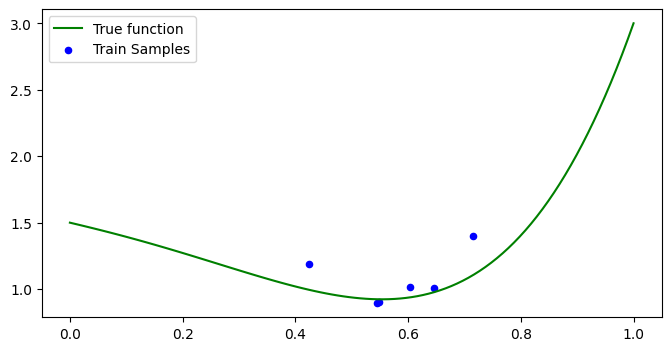

In [14]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings('ignore')

import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [8, 4]
np.random.seed(0)

## please keep the below codes for generating x, DO NOT CHANGE!
# ==========================================================================================
n_train_samples = 6
X_train = np.sort(np.random.rand(n_train_samples)) 

order_true = 5
true_coefficient = np.array([.5, -1, -.5, -2, 5])

def true_fn(X):
    f = np.ones((X.shape))
    for i in range(order_true):
        f += true_coefficient[i] * X**i
    return f

X_test = np.linspace(0., 1., 100)
## adding y_train
y_train = true_fn(X_train) + (np.random.randn(n_train_samples)) * 0.2

plt.plot(X_test,true_fn(X_test),'g',label = 'True function')
plt.scatter(X_train, y_train, edgecolor='b', s=20, facecolor = 'b', label="Train Samples")
plt.legend()

# [CONTINUE YOUR WORK FROM HERE!]


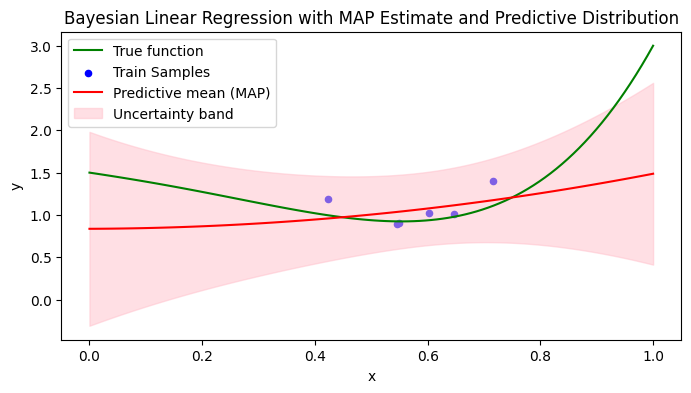

In [27]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from numpy.linalg import inv

# # Set random seed for reproducibility
# np.random.seed(0)

# # Generate data points
# n_train_samples = 6
# X_train = np.sort(np.random.rand(n_train_samples)).reshape(-1, 1)

# # Polynomial function for f(x)
# def true_fn(X):
#     return 0.5 - X - 0.5 * X**2 - 2 * X**3 + 5 * X**4

# Add Gaussian noise with delta = 0.2
delta = 0.2
# y_train = true_fn(X_train) + np.random.normal(0, delta, size=X_train.shape)

# Plot the true function and noisy data samples
X_test = np.linspace(0, 1, 100).reshape(-1, 1)
plt.plot(X_test, true_fn(X_test), 'g', label='True function')
plt.scatter(X_train, y_train, edgecolor='b', s=20, facecolor='b', label='Train Samples')
plt.legend()

# Bayesian Linear Regression with MAP estimate
def design_matrix(X, degree):
    poly = PolynomialFeatures(degree=degree)
    return poly.fit_transform(X.reshape(-1, 1))

degree = 2  # Assuming 2nd order model for PolynomialFeatures
Phi_train = design_matrix(X_train, degree)

# Prior settings (regularization parameter lambda)
lambda_sq = 4 # Prior variance (chosen as 1 for simplicity)

# Compute theta_MAP (MAP estimate)
I = np.eye(Phi_train.shape[1])  # Identity matrix
theta_map = inv(Phi_train.T @ Phi_train + (delta**2 / lambda_sq) * I) @ Phi_train.T @ y_train

# Compute posterior covariance (sigma_0)
sigma_0 = inv((1 / delta**2) * (Phi_train.T @ Phi_train) + (1 / lambda_sq) * I)

# Predictive distribution
def predictive_distribution(X_test, theta_map, sigma_0, degree):
    Phi_test = design_matrix(X_test, degree)
    mean_pred = Phi_test @ theta_map   
    var_pred = np.sum(Phi_test @ sigma_0 * Phi_test, axis=1) + delta**2
    return mean_pred, np.sqrt(var_pred)

mean_pred, std_pred = predictive_distribution(X_test, theta_map, sigma_0, degree)
# Plot predictive mean and uncertainty bands
plt.plot(X_test, mean_pred, 'r', label='Predictive mean (MAP)')
plt.fill_between(X_test.flatten(), mean_pred.flatten()-2*std_pred.flatten(), 
                 mean_pred.flatten()+2*std_pred.flatten(), color='pink', alpha=0.5, label='Uncertainty band')

plt.legend()
plt.title('Bayesian Linear Regression with MAP Estimate and Predictive Distribution')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

# Discussion:
# - theta_map is the result of optimizing the regularized loss function.
# - The prior variance (lambda^2) acts as regularization to avoid overfitting.
# - The predictive distribution takes into account the posterior uncertainty (sigma_0).


### 1.3 - benefits of Bayesian vs Maximum Likelihood

$\quad$ By incorporating prioir information of the parameters with the use of prioir distributions, the Bayesian methods can take into consideration previous data or domain knowledge to inform current analysis. The maximum likelihood approach does not allow incorporation of prior information or results, and relies solely on the observed data at the current time. 

$\quad$ Bayesian methods provide a full posterior distribution (posterioir predictive distribution) which provides the complete picture of both the appropriate value and uncertainity for each estimate; meanwhile, maximum likelihood can only provide an estimate of the parameter without quantifying the uncertainity of the estimate. 

$\quad$ With the use of the prioir, Bayesian methods can be more stable for small sample sizes; with just the small sample size (and no prior), maximum likelihood estimates may produce widely unreliable results. 



## **Question 2** (20 Points) Mean and Covariance

In lecture 7, we maximize the likelihood:
$$\max_{\boldsymbol{\mu}_k, {\Sigma}_k} \sum_{i : y^{(i)} = k} \log P(\boldsymbol{x}^{(i)} | y^{(i)} ; \boldsymbol{\mu}_k, {\Sigma}_k)
= \max_{\boldsymbol{\mu}_k, {\Sigma}_k} \sum_{i : y^{(i)} = k} \log \mathcal{N}(\boldsymbol{x}^{(i)} | \boldsymbol{\mu}_k, {\Sigma}_k).$$
Prove that the empirical means and covariances of each class $k$ are 
\begin{align*}
\bs{\mu}_k & = \frac{\sum_{i: y^{(i)} = k} \x^{(i)}}{n_k} \\
{\Sigma}_k & = \frac{\sum_{i: y^{(i)} = k} (\x^{(i)} - \bs{\mu}_k)(\x^{(i)} - \bs{\mu}_k)^\top}{n_k}.
\end{align*}

where $\boldsymbol{x}^{(i)} \in \mathbb{R}^n$, $\boldsymbol{\mu} \in \mathbb{R}^n$, $\Sigma \in \mathbb{R}^{n \times n}$, $n$ is the number of features of training sample $\boldsymbol{x}^{(i)}$.


## Question 3: (25 Points) Generative VS Discriminative Models

We are going to use the Iris flower dataset. We will use three features sepal length (cm), sepal width (cm), petal length (cm) to classify types of flowers in generative model.
1. Compute the empirical means and covariance matrices for each type of flowers.
2. Generating new flowers, denoted as set $S$, from the learned propability and plotting these generated flowers in 3D. Observe and discuss your results.
3. We assume that set $S$ is test data. Classify the test data $S$ using the generative model that you have found in question 4.1. Discuss you results.
4. We assume that set $S$ is test data. Using logistic regression to training the model, then verify the learn model with test data $S$. Compare and discuss your results with question 4.3

In [141]:
import numpy as np 
import pandas as pd 
import warnings 
warnings.filterwarnings('ignore') 
from sklearn import datasets 
 
# Load the Iris dataset 
iris = datasets.load_iris(as_frame=True) 
 
# print part of the dataset 
iris_X, iris_y = iris.data, iris.target 
pd.concat([iris_X, iris_y], axis=1).head() 

#print(iris_X.shape, iris_y.shape)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


### 3.0 - data

Note that the different colors for each cluster in the plots is representative of a different iris flower type (i.e., setosa, versicolor, etc.).

   sepal_length  sepal_width  petal_length  target
0           5.1          3.5           1.4       0
1           4.9          3.0           1.4       0
2           4.7          3.2           1.3       0
3           4.6          3.1           1.5       0
4           5.0          3.6           1.4       0


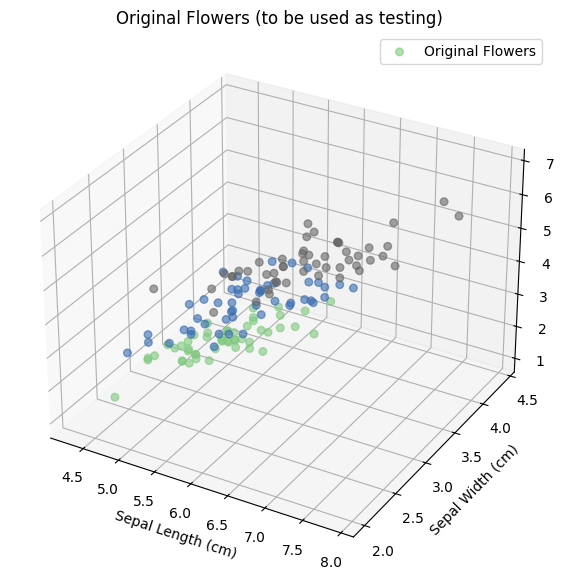

In [142]:

# Create a DataFrame for easier handling
# Select only the desired columns: sepal length, sepal width, and petal length
iris_X = iris_X[['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)']]

# Rename the columns
iris_X.columns = ['sepal_length', 'sepal_width', 'petal_length']
iris_y.name = 'target'

df = pd.concat([iris_X, iris_y], axis=1)
df.columns = ['sepal_length', 'sepal_width', 'petal_length', 'target']


# Display the first few rows of the dataset
print(df.head())
# compare generate vs train
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
ax.set_xlabel('Sepal Length (cm)')
ax.set_ylabel('Sepal Width (cm)')
ax.set_zlabel('Petal Length (cm)')
plt.title('Original Flowers (to be used as testing)')
scatter1 = ax.scatter(iris_X['sepal_length'], iris_X['sepal_width'], iris_X['petal_length'], c=iris_y, cmap='Accent', s=30, alpha=0.6, label='Original Flowers')

ax.legend()
plt.show()

### 3.1 - mean/covariance for each flower

In [147]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score


# 1. Compute the empirical means and covariance matrices for each type of flower.
means = {}
covariances = {}

for target in np.unique(iris_y):
    flower_data = df[df['target'] == target][['sepal_length', 'sepal_width', 'petal_length']]
    means[target] = flower_data.mean().values
    covariances[target] = flower_data.cov().values

print("Empirical Means:")
for target, mean in means.items():
    print(f"Class {target}: {mean}")

print("\nCovariance Matrices:")
for target, cov in covariances.items():
    print(f"Class {target}:\n{cov}\n")


Empirical Means:
Class 0: [5.006 3.428 1.462]
Class 1: [5.936 2.77  4.26 ]
Class 2: [6.588 2.974 5.552]

Covariance Matrices:
Class 0:
[[0.12424898 0.09921633 0.0163551 ]
 [0.09921633 0.1436898  0.01169796]
 [0.0163551  0.01169796 0.03015918]]

Class 1:
[[0.26643265 0.08518367 0.18289796]
 [0.08518367 0.09846939 0.08265306]
 [0.18289796 0.08265306 0.22081633]]

Class 2:
[[0.40434286 0.09376327 0.3032898 ]
 [0.09376327 0.10400408 0.07137959]
 [0.3032898  0.07137959 0.30458776]]



### 3.2 - generate new flowers

Text(0.5, 0.92, 'Generated Flowers from the Generative Model')

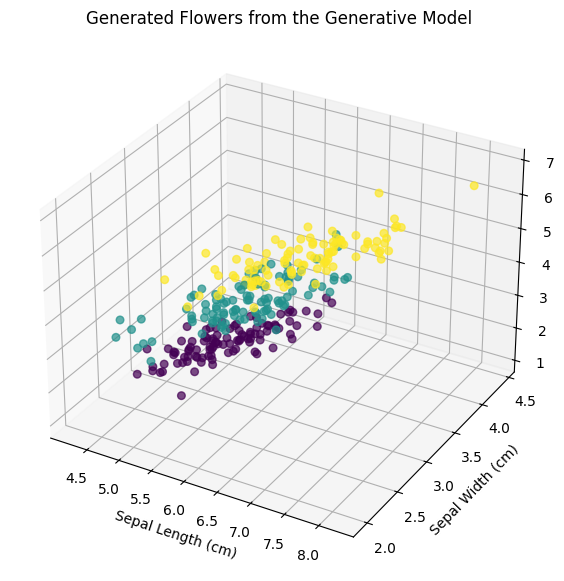

In [163]:

# 2. Generate new flowers from the learned probability and plot them in 3D.
num_samples = 100
S = []

for target in np.unique(iris_y):
    mean = means[target]
    cov = covariances[target]
    # Generate samples from a multivariate normal distribution
    new_samples = np.random.multivariate_normal(mean, cov, num_samples)
    S.append(new_samples)

# Convert the list of arrays to a single array
S = np.vstack(S)
S_labels = np.concatenate([[target]*num_samples for target in np.unique(iris_y)])

# 3D Plotting of the generated flowers
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(S[:, 0], S[:, 1], S[:, 2], c=S_labels, cmap='viridis', s=30, alpha=0.7)
ax.set_xlabel('Sepal Length (cm)')
ax.set_ylabel('Sepal Width (cm)')
ax.set_zlabel('Petal Length (cm)')
plt.title('Generated Flowers from the Generative Model')


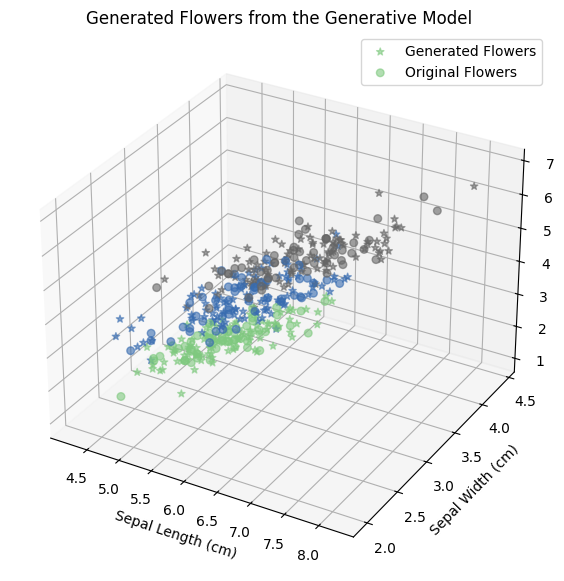

In [167]:
# compare generate vs train
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(S[:, 0], S[:, 1], S[:, 2], c=S_labels, cmap='Accent', s=30, alpha=.6, label = "Generated Flowers", marker = '*')
ax.set_xlabel('Sepal Length (cm)')
ax.set_ylabel('Sepal Width (cm)')
ax.set_zlabel('Petal Length (cm)')
plt.title('Generated Flowers from the Generative Model')
scatter1 = ax.scatter(iris_X['sepal_length'], iris_X['sepal_width'], iris_X['petal_length'], c=iris_y, cmap='Accent', s=30, alpha=0.6, label='Original Flowers')

ax.legend()
plt.show()

#### Discussion
Generated Flowers: The new flowers were generated using a multivariate normal distribution based on the empirical means and covariance matrices of the original Iris dataset. This process simulates how new data points might look if they follow the same statistical properties as the original data.

3D Plot: The plot shows the generated flowers in a 3D space defined by sepal length, sepal width, and petal length. Each point is colored according to its class label, providing a visual representation of the distribution of the generated flowers.

Distribution: The generated flowers should ideally follow the same distribution as the original flowers. If the generative model has captured the underlying data distribution well, the generated points will be spread out in a similar manner to the original data points. This is especially obvious in the second plot, where the true data and the generated data are overlayed/plotted on the same plot. Note that the different colors are representative of different iris groups; the similar groupings of the generated and true data are obvious, indicating a well-built generative model.  

Model Validation: This visualization helps validate the generative model by comparing the spread and clustering of the generated flowers to the original dataset. If the generated flowers appear to be well-distributed and form similar clusters, it indicates that the model has effectively learned the underlying distribution of the data (this is true, per our visual observation).

### 3.3 - classify test data S

In [168]:

# 3. Classify the test data using the generative model.
# We'll use the multivariate Gaussian likelihood for classification
def classify_generative(samples, means, covariances):
    predictions = []
    for sample in samples:
        probs = []
        for target in np.unique(iris_y):
            mean = means[target]
            cov = covariances[target]
            # Calculate the multivariate Gaussian probability density
            diff = sample - mean
            prob = np.exp(-0.5 * diff.T @ np.linalg.inv(cov) @ diff) / np.sqrt(np.linalg.det(cov) * (2 * np.pi) ** len(mean))
            probs.append(prob)
        predictions.append(np.argmax(probs))
    return np.array(predictions)   

predictions_generative = classify_generative(S, means, covariances)
accuracy_generative = accuracy_score(S_labels, predictions_generative)
print(f"Generative Model Classification Accuracy: {accuracy_generative:.4f}")

Generative Model Classification Accuracy: 0.9467


#### Discussion
The generative model accuracy is $\approx 94.67% $. The high accuracy is indicative of an effective generative model (effective at classifying test data). This suggests that the model has successfully captured the underlying data distribution and can distinguish between different classes. 

Note that the generative model assumes the features follow a gaussian distribution; the high accuracy implies that this assumption is reasonably valid for th Iris dataset, which led the model to perform well.

### 3.4 - logistic regression

In [169]:

# Fit logistic regression
logistic_model = LogisticRegression(max_iter=500)
logistic_model.fit(iris_X, iris_y)

# Verify the learned model with test data S
predictions_logistic = logistic_model.predict(S)
accuracy_logistic = accuracy_score(S_labels, predictions_logistic)
print(f"Logistic Regression Classification Accuracy: {accuracy_logistic:.4f}")

Logistic Regression Classification Accuracy: 0.9400


#### Discussion
The discriminative logistic regression model accuracy is $\approx 94.00 \% $. The high accuracy is indicative of an effective discriminative model (effective at classifying test data). This suggests that the model has successfully captured the underlying data distribution and can distinguish between different classes. 
Note that discriminative models directly model $P(y|x)$ and do not need assumptions about the gaussian features. So, we would expect the logistic regression to be at a higher accuracy than the generative model. Note that we have probabilistic models, so we may not always see logistic regression having a higher accuracy than the generative model. 

$P(x|y)$: This is the probability of the features ( x ) given the class label ( y ). Generative models model this conditional probability. They assume a specific distribution for the features given the class (e.g., Gaussian distribution).

$P(y)$: This is the prior probability of the class label ( y ). Generative models also model this prior probability.

$P(x)$: This is the marginal probability of the features ( x ). It can be computed using the law of total probability: ( $P(x) = \sum_y P(x|y) P(y)$ ).

$P(y|x)$: This is the posterior probability of the class label ( y ) given the features ( x ). Generative models use Bayes’ theorem to compute this.

## Question 4: (25 Points) Bernoulli Naive Bayes Model

1. Derive the formula, from lecture 8, for the optimal value of $\psi_{jk}$
\begin{align*}
\psi_{jk} = \frac{n_{jk}}{n_k}.
\end{align*}
2. In lecture 8, we classified a document by the Naive Bayes (bag of words) method. You will now make a simple comparison between Naive Bayes and Logistic Regression. Remove class 2 and 3 from the training data. By doing so, our data becomes a binary classification problem. Perform the Naive Bayes (bag of words) method and logistic regression method for the obtained 2-class data. Discuss the results.

In [9]:
import numpy as np
# import pandas as pd
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import CountVectorizer

# for this lecture, we will restrict our attention to just 4 different newsgroups:
categories = ['alt.atheism', 'soc.religion.christian', 'comp.graphics', 'sci.med']

# load the dataset
twenty_train = fetch_20newsgroups(subset='train', categories=categories, shuffle=True, random_state=42)

# vectorize the training set
count_vect = CountVectorizer(binary=True, max_features=1000)
y_train = twenty_train.target
X_train = count_vect.fit_transform(twenty_train.data).toarray()
X_train.shape

print('NOTE: our data has 4 class group')
print(y_train)
print('You NEED to remove class 2 and 3 to create the 2-class data')
y_train

NOTE: our data has 4 class group
[1 1 3 ... 2 2 2]
You NEED to remove class 2 and 3 to create the 2-class data


array([1, 1, 3, ..., 2, 2, 2])

In [12]:
import numpy as np
# import pandas as pd
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report


twenty_test = fetch_20newsgroups(subset='test', categories=categories, shuffle=True, random_state=42)

# vectorize the training set
count_vect_test = CountVectorizer(binary=True, max_features=1000)
y_test = twenty_test.target
X_test = count_vect_test.fit_transform(twenty_test.data).toarray()



# Filter out classes 2 and 3
mask_train = np.isin(y_train, [0, 1])  # Keep only classes 0 and 1
X_train_split = X_train[mask_train]
y_train_split = y_train[mask_train]
mask_test = np.isin(y_test, [0, 1])  # Keep only classes 0 and 1
X_test_split = X_test[mask_test]
y_test_split = y_test[mask_test]
# # Split the data into training and testing sets
# X_train_split, X_test_split, y_train_split, y_test_split = train_test_split(
#     X_train_binary, y_train_binary, test_size=0.2, random_state=42
# )

# Train Naive Bayes
nb_classifier = MultinomialNB()
nb_classifier.fit(X_train_split, y_train_split)
y_pred_nb = nb_classifier.predict(X_test_split)
y_pred_train_nb = nb_classifier.predict(X_train_split)
# Train Logistic Regression
logistic_classifier = LogisticRegression()
logistic_classifier.fit(X_train_split, y_train_split)
y_pred_logistic = logistic_classifier.predict(X_test_split)
y_pred_train_logistic = logistic_classifier.predict(X_train_split)

# Evaluate and compare results
print("Naive Bayes Results:")
print("Accuracy:", accuracy_score(y_test_split, y_pred_nb))
print(classification_report(y_test_split, y_pred_nb, target_names=twenty_train.target_names[:2]))

print("Logistic Regression Results:")
print("Accuracy:", accuracy_score(y_test_split, y_pred_logistic))
print(classification_report(y_test_split, y_pred_logistic, target_names=twenty_train.target_names[:2]))


print("Naive Bayes Results:")
print("Accuracy:", accuracy_score(y_train_split, y_pred_train_nb))
# print(classification_report(y_test_split, y_pred_nb, target_names=twenty_train.target_names[:2]))

print("Logistic Regression Results:")
print("Accuracy:", accuracy_score(y_train_split, y_pred_train_logistic))
# print(classification_report(y_test_split, y_pred_logistic, target_names=twenty_train.target_names[:2]))

Naive Bayes Results:
Accuracy: 0.5918079096045198
               precision    recall  f1-score   support

  alt.atheism       0.52      1.00      0.69       319
comp.graphics       1.00      0.26      0.41       389

     accuracy                           0.59       708
    macro avg       0.76      0.63      0.55       708
 weighted avg       0.79      0.59      0.53       708

Logistic Regression Results:
Accuracy: 0.8177966101694916
               precision    recall  f1-score   support

  alt.atheism       0.81      0.77      0.79       319
comp.graphics       0.82      0.85      0.84       389

     accuracy                           0.82       708
    macro avg       0.82      0.81      0.82       708
 weighted avg       0.82      0.82      0.82       708

Naive Bayes Results:
Accuracy: 0.9821428571428571
Logistic Regression Results:
Accuracy: 1.0
